In [2]:
import pandas as pd
def print_df(df):
  total_rows = df.shape[0]
  dataframe_info = df.info()
  dataframe_description = df.describe()
  print(total_rows)
  print(dataframe_info)

def pick_latest_if_multiple(group):
    if group['lab_result_text_val'].nunique() > 1 and group['date'].nunique() > 1:
        return group.sort_values(by='date', ascending=False).head(1)
    elif group['lab_result_text_val'].nunique() > 1 and group['date'].nunique() == 1:
        return pd.DataFrame()
    elif group['lab_result_text_val'].nunique() == 1 and group['date'].nunique() > 1:
        return group.sort_values(by='date', ascending=False).head(1)
    elif group['lab_result_text_val'].nunique() == 1 and group['date'].nunique() == 1:
        return group.head(1)
    else:
        print('aqsa')

# Read the smaller CSV file
smaller_file_path = '/content/drive/MyDrive/chagas/lab_result.csv'
diagnosis = pd.read_csv(smaller_file_path)


# Find the unique values in 'lab_result_text_val' and count their occurrences
unique_values_count = diagnosis['code'].value_counts()
# Display the unique values and their counts
print(unique_values_count)
# Display the first few rows of the smaller file
print("First 5 rows of the smaller CSV file:")
print(diagnosis.head())


# Extract unique codes from the 'code' column
unique_codes = diagnosis['code'].unique()
# List of codes to check
codes_to_check = [
    '57320-4', '60553-5', '13291-0', '59387-1', '32725-4',
     '23785-9', '10729-2', '14094-7', '23533-3'
]
#LOINC 59387-1, LOINC 14094-7, LOINC 13291-0, LOINC 13290-2
# Check if each code is present in the unique codes
for code in codes_to_check:
    if code in unique_codes:
        print(f"Code {code} is present.")
    else:
        print(f"Code {code} is NOT present.")


# Filter the rows where the 'code' column matches any of the codes_to_check
filtered_df = diagnosis[diagnosis['code'].isin(codes_to_check)]
# Drop rows where both 'lab_result_num_val' and 'lab_result_text_val' are NaN
diagnosis_cleaned = filtered_df.dropna(subset=['lab_result_num_val', 'lab_result_text_val'], how='all')
# Drop the specified columns
columns_to_drop = ['code_system', 'units_of_measure', 'derived_by_TriNetX', 'source_id']
diagnosis_cleaned = diagnosis_cleaned.drop(columns=columns_to_drop)



# Step 2: Check if there are numerical values in 'lab_result_num_val'
# and update 'lab_result_text_val' accordingly
for index, row in diagnosis_cleaned.iterrows():
    num_val = row['lab_result_num_val']  # Get the numerical value
    if pd.notna(num_val):  # Check if it's not NaN (means there is a value)
        if num_val <= 1.0:
            diagnosis_cleaned.at[index, 'lab_result_text_val'] = 'Negative'
        elif num_val >= 1.2:
            diagnosis_cleaned.at[index, 'lab_result_text_val'] = 'Positive'
        else:
            diagnosis_cleaned.at[index, 'lab_result_text_val'] = 'Unknown'


# Ensure that 'date' is in a proper datetime format
diagnosis_cleaned['date'] = pd.to_datetime(diagnosis_cleaned['date'], format='%Y%m%d', errors='coerce')
# Group by 'patient_id' and 'code'
grouped = diagnosis_cleaned.groupby(['patient_id', 'code'])
# Apply the function to each group and concatenate the results
cleaned_data1 = grouped.apply(pick_latest_if_multiple).reset_index(drop=True)
print_df(cleaned_data1)


grouped1 = cleaned_data1.groupby(['patient_id'])
# Apply the function to each group and concatenate the results
filtered_data = grouped1.apply(pick_latest_if_multiple).reset_index(drop=True)


#  save the cleaned data to a new file
merged_file_path = '/content/drive/MyDrive/chagas/cleaned_9_codes_lab_result.csv'
filtered_data.to_csv(merged_file_path, index=False)
print(f"cleaned data saved to: {merged_file_path}")

code
2951-2     1137409
2345-7     1131411
2823-3     1080131
2160-0     1072174
789-8      1058776
            ...   
12914-8          1
12443-8          1
12416-4          1
10545-2          1
579-3            1
Name: count, Length: 9038, dtype: int64
First 5 rows of the smaller CSV file:
  patient_id encounter_id code_system     code      date  lab_result_num_val  \
0         4Q           7Q       LOINC  10886-0  20230703                 0.2   
1         4Q          7AB       LOINC  11277-1  20200130                 NaN   
2         4Q          7QB       LOINC  11277-1  20210831                 NaN   
3         4Q           7Q       LOINC  12841-3  20230703                40.0   
4         4Q          7AB       LOINC  13945-1  20200130                 NaN   

  lab_result_text_val units_of_measure derived_by_TriNetX source_id  
0                 NaN            ng/mL                  F       EHR  
1                 NaN           /[HPF]                  F       EHR  
2                

<ipython-input-2-ab59f097ce7e>:79: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned_data1 = grouped.apply(pick_latest_if_multiple).reset_index(drop=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23269 entries, 0 to 23268
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   patient_id           23269 non-null  object        
 1   encounter_id         23269 non-null  object        
 2   code                 23269 non-null  object        
 3   date                 23269 non-null  datetime64[ns]
 4   lab_result_num_val   8732 non-null   float64       
 5   lab_result_text_val  23269 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.1+ MB
23269
None
cleaned data saved to: /content/drive/MyDrive/chagas/cleaned_9_codes_lab_result.csv


<ipython-input-2-ab59f097ce7e>:85: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_data = grouped1.apply(pick_latest_if_multiple).reset_index(drop=True)


In [4]:
# Load the lab_result dataset and cleaned_patient dataset and patient
lab_result_file_path = '/content/drive/MyDrive/chagas/lab_result.csv'
cleaned_patient_file_path = '/content/drive/MyDrive/chagas/cleaned_9_codes_lab_result.csv'
patient_file_path = '/content/drive/MyDrive/chagas/patient.csv'

lab_result_data = pd.read_csv(lab_result_file_path)
cleaned_patient_data = pd.read_csv(cleaned_patient_file_path)
patient_data = pd.read_csv(patient_file_path)

# List of codes to exclude
excluded_codes = ['57320-4', '60553-5', '13291-0', '59387-1', '32725-4', '23785-9', '10729-2', '14094-7', '23533-3', '13290-2']

# Filter lab_result data to include only patients in cleaned_patient_data and exclude specified codes
filtered_lab_result = lab_result_data[lab_result_data['patient_id'].isin(cleaned_patient_data['patient_id']) &
                                      ~lab_result_data['code'].isin(excluded_codes)]

diagnosis_cleaned = filtered_lab_result.dropna(subset=['lab_result_num_val', 'lab_result_text_val'], how='all')
# Drop the specified columns
columns_to_drop = ['code_system', 'units_of_measure', 'derived_by_TriNetX', 'source_id']
diagnosis_cleaned = diagnosis_cleaned.drop(columns=columns_to_drop)
# Convert 'date' column to datetime format to ensure proper sorting
diagnosis_cleaned['date'] = pd.to_datetime(diagnosis_cleaned['date'], errors='coerce')
# Sort the data by 'patient_id', 'code', and 'date' (latest date first)
lab_result_data_sorted = diagnosis_cleaned.sort_values(by=['patient_id', 'code', 'date'], ascending=[True, True, False])
# Drop duplicate rows, keeping only the first (latest) occurrence
cleaned_data = lab_result_data_sorted.drop_duplicates(subset=['patient_id', 'code'], keep='first')


# List of required codes
required_codes = [
'789-8', '788-0', '731-0', '711-2', '2885-2', '2951-2', '6768-6', '2160-0',
'2028-9', '2823-3', '3094-0', '1975-2', '1920-8'
]
# Step 2: Pivot the lab_result data to create a wide format with each code as a column
df_pivot = cleaned_data.pivot_table(index='patient_id', columns='code', values='lab_result_num_val', aggfunc='first')
# Step 3: Filter the patients who have all the required codes
df_pivot_filtered = df_pivot.dropna(subset=required_codes)
# Step 4: Only keep the required columns (patient_id and the required codes)
df_result = df_pivot_filtered[required_codes]
df_result.reset_index(inplace=True)


merged_data = pd.merge(df_result, cleaned_patient_data, on='patient_id', how='inner')
print(merged_data.head())
# Count occurrences of each 'lab_result_text_val' value
lab_result_counts = merged_data['lab_result_text_val'].value_counts()
# Print the counts
print("Lab result text value counts:")
print(lab_result_counts)

#merge patients_info as well
merged_data1 = pd.merge(merged_data, patient_data, on='patient_id', how='inner')
# Drop the specified columns
columns_to_drop = ['source_id', 'marital_status', 'reason_yob_missing', 'month_year_death', 'death_date_source_id']
merged_data2 = merged_data1.drop(columns=columns_to_drop)
# Save the merged data to a new file
merged_output_file = '/content/drive/MyDrive/chagas/patients_final_data.csv'
merged_data2.to_csv(merged_output_file, index=False)


  patient_id  789-8  788-0    731-0  711-2  2885-2  2951-2  6768-6  2160-0  \
0        #QE   5.19   12.0     1.89   0.10     7.3   138.0   136.0    0.70   
1        #gF   4.84   11.7  2030.00  50.00     7.2   144.0   139.0    0.65   
2        #wB   5.07   12.5  1359.00  28.00     7.1   141.0    53.0    0.72   
3        #wF   2.86   17.5     0.40   0.00     5.3   133.0   121.0    2.36   
4       0A#D   4.95   12.3     2.46   0.03     6.8   141.0   117.0    1.11   

   2028-9  2823-3  3094-0  1975-2  1920-8 encounter_id     code        date  \
0    24.0     3.6    17.0     2.3   669.0         CxxB  57320-4  2021-08-25   
1    26.0     4.7    12.0     0.6    18.0         Cx9B  57320-4  2022-08-11   
2    30.0     4.0    10.0     0.4    15.0         ChGB  57320-4  2022-12-12   
3    21.0     4.3    90.0     0.8    32.0         Ch_B  59387-1  2017-05-08   
4    27.0     4.5    10.0     0.7    58.0        3gt5G  13291-0  2022-06-16   

   lab_result_num_val lab_result_text_val  
0           

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Shape of X_train_resampled: (29304, 14)
Shape of y_train_resampled: (29304,)
Class distribution in y_train_resampled:
lab_result_text_val
Negative    9768
Unknown     9768
Positive    9768
Name: count, dtype: int64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3319
[LightGBM] [Info] Number of data points in the train set: 29304, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
              precision    recall  f1-score   support

    Negative       0.95      0.96      0.95      2443
    Positive       0.20      0.02      0.03        66
     Unknown       0.77      0.83      0.80       444

    accuracy                           0.92      295

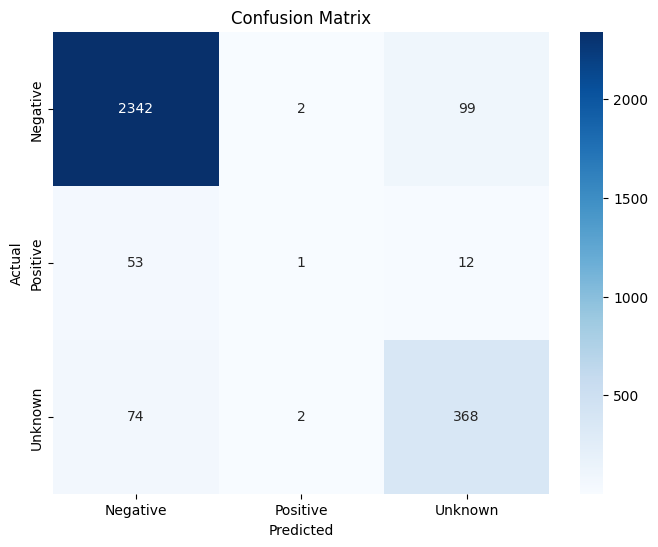

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = '/content/drive/MyDrive/chagas/patients_final_data.csv'
data = pd.read_csv(file_path)

# Select the features and labels
features = ['789-8', '788-0', '731-0', '711-2', '2885-2', '2951-2', '6768-6',
            '2160-0', '2028-9', '2823-3', '3094-0', '1975-2', '1920-8', 'patient_regional_location']
label = 'lab_result_text_val'

# Extract features and label from the dataframe
X = data[features]
y = data[label]

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Encode categorical columns like 'patient_regional_location'
le = LabelEncoder()
if X_imputed['patient_regional_location'].dtype == 'object':
    X_imputed['patient_regional_location'] = le.fit_transform(X_imputed['patient_regional_location'])

# Separate numerical and categorical features
numerical_features = ['789-8', '788-0', '731-0', '711-2', '2885-2', '2951-2', '6768-6',
                      '2160-0', '2028-9', '2823-3', '3094-0', '1975-2', '1920-8']
categorical_features = ['patient_regional_location']

# Normalize the numerical features
scaler = StandardScaler()
X_imputed[numerical_features] = scaler.fit_transform(X_imputed[numerical_features])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Oversampling using SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of X_train_resampled and y_train_resampled
print(f"Shape of X_train_resampled: {X_train_resampled.shape}")
print(f"Shape of y_train_resampled: {y_train_resampled.shape}")

# Count the number of 'Positive', 'Negative', and 'Unknown' in y_train_resampled
class_distribution = y_train_resampled.value_counts()

print("Class distribution in y_train_resampled:")
print(class_distribution)

# Train a classifier (Random Forest as an example)
clf = lgb.LGBMClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Unknown'],
            yticklabels=['Negative', 'Positive', 'Unknown'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()